<a href="https://colab.research.google.com/github/ajinvinodk/M.Tech-CSP_PGP/blob/main/code_CR_8_All_Noise_butterfly_classification%26reconstruction_10epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import time
import sys
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import BatchNormalization
#from tensorflow.keras.layers import Conv2D
#from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.losses import binary_crossentropy
#from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from tensorflow.image import psnr

In [2]:
((trainX, trainY), (testX, testY)) = mnist.load_data()
trainX_cnn = trainX
trainY_cnn = trainY
testX_cnn = testX
testY_cnn = testY
trainX_cnn = trainX_cnn.reshape(trainX_cnn.shape[0], 28, 28, 1)
testX_cnn = testX_cnn.reshape(testX_cnn.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
trainX_cnn = trainX_cnn.astype("float32") / 255.0
testX_cnn = testX_cnn.astype("float32") / 255.0

trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
testX1=testX
trainX1=trainX
trainY1=trainY
testY1=testY
trainY = trainX.reshape(60000,784)
testY = testX.reshape(10000,784)
input_1 = (trainX[:,:14,:])
input_2 = (trainX[:,14:28,:])
input_test_1 = (testX[:,:14,:])
input_test_2 = (testX[:,14:28,:])

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
testY1.shape

(10000,)

In [4]:
def build_model_1(width, height, depth):
	inputShape = (width,height, depth)	
	model = Sequential([
		Flatten(input_shape = inputShape),
		Dense(198,activation = 'relu'),
    Dense(64,activation = 'relu')
	])
	return model

In [5]:
def build_model_2(width, height, depth):
	inputShape = (width,height, depth)	
	model = Sequential([
		Flatten(input_shape = inputShape),
		Dense(198,activation = 'relu'),
    Dense(64,activation = 'relu')
	])
	return model

In [6]:
def build_model_3(width, height, classes):
	inputShape = (width,height)
	model = Sequential([
		Flatten(input_shape = inputShape),
		Dense(32,activation = 'relu'),
    Dense(32,activation = 'relu'),
	])
	return model

In [7]:
def build_model_4(width, height, classes):
	inputShape = (width,height)
	model = Sequential([
		Flatten(input_shape = inputShape),
		Dense(48,activation = 'relu'),
    Dense(64,activation = 'relu')
	])
	return model

In [8]:
def build_model_5(width, height, classes):
	inputShape = (width,height)
	model = Sequential([Flatten(input_shape=inputShape),
          Dense(32, activation="relu"),
          Dense(16, activation="relu"),
          Dense(10, activation="softmax")
          ])
	return model

In [9]:
def build_model_6(width, height, classes):
	inputShape = (width,height)
	model = Sequential([
		Flatten(input_shape = inputShape),
    Dense(392,activation = 'relu'),
		Dense(classes, activation= "sigmoid")#"softmax")
	])
	return model

In [10]:
EPOCHS = 10
BS = 32
INIT_LR = 1e-2
print("[INFO] creating model...")
model1= build_model_1(14,28,1)
model2= build_model_2(14,28,1)
model3= build_model_3(64,1,32)
model4= build_model_4(32,1,64)
model5= build_model_5(64,1,784)
model6= build_model_6(64,1,784)
opt = tf.keras.optimizers.legacy.Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# Adam(
#     learning_rate=INIT_LR,
#     beta_1=0.9,
#     beta_2=0.999,
#     epsilon=1e-07,
#     amsgrad=False,
#     weight_decay=None,
#     clipnorm=None,
#     clipvalue=None,
#     global_clipnorm=None,
#     use_ema=False,
#     ema_momentum=0.99,
#     ema_overwrite_frequency=None,
#     jit_compile=True,
#     name='Adam',
#     # **kwargs
# )
# Adam(learning_rate=INIT_LR)# decay=INIT_LR / EPOCHS)

[INFO] creating model...


In [11]:
model1.summary()
# model2.summary()
# model3.summary()
# model4.summary()
model5.summary()
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 198)               77814     
                                                                 
 dense_1 (Dense)             (None, 64)                12736     
                                                                 
Total params: 90,550
Trainable params: 90,550
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (

In [12]:
#pred1 = model1(input_1[0:32])

In [13]:
#pred1

In [14]:
noise = np.random.normal(0,0.01,32)
noise1 = np.random.normal(0,0.01,64)

In [15]:
def step(X1,X2,y,y1):
    
    with tf.GradientTape(persistent=True) as tape:
      pred1 = model1(X1)
      pred2 = model2(X2)

      pred1 = pred1 + noise1
      pred2 = pred2 + noise1
      

      pred1_A, pred1_B =tf.split(pred1,num_or_size_splits=2,axis=1)
      pred2_A, pred2_B =tf.split(pred2,num_or_size_splits=2,axis=1)

      
      
      X3 = tf.keras.layers.concatenate([pred1_B,pred2_A])
      pred3 = model3(X3)
      pred3 = pred3 + noise
      pred4 = model4(pred3)
      pred4 = pred4 + noise1

      pred4_A, pred4_B =tf.split(pred4,num_or_size_splits=2,axis=1)

      

      X4 = tf.keras.layers.concatenate([pred1_A,pred4_A])
      X5 = tf.keras.layers.concatenate([pred4_B,pred2_B])

      pred5 = model5(X4)
      pred6 = model6(X5)
    
      loss5 =sparse_categorical_crossentropy(y1, pred5)
      # loss5 = binary_crossentropy(y, pred5)
      loss6 = binary_crossentropy(y, pred6)

      #print(loss5.shape)

    # grads6_5 = tape.gradient(loss6, model5.trainable_variables)
    #print("grads6_5 length is = ",grads6_5)
    grads6 = tape.gradient(loss6, model6.trainable_variables)#------------------------------
    #print("grads6_5 length is = ",grads6)
    grads5 = tape.gradient(loss5, model5.trainable_variables)#------------------------------

    # print()
    # print("grads6 length is = ",len(grads6))
    # print("grads6 type is = ",type(grads6))
    # print("grad6[0].shape = ",grads6[0].shape)
    # print("grads6[0] type is = ",type(grads6[0]))
    # print("grad6[1].shape = ",grads6[1].shape)
    # print("grads6[0] type is = ",type(grads6[0]))
    # print("grad6[2].shape = ",grads6[2].shape)
    # print("grads6[0] type is = ",type(grads6[0]))
    # print("grad6[3].shape = ",grads6[3].shape)
    # print("grads6[0] type is = ",type(grads6[0]))
    #print(model5.trainable_variables[1])
    grads4 = tape.gradient([loss5,loss6], model4.trainable_variables)#------------------------------
    grads3 = tape.gradient([loss5,loss6], model3.trainable_variables)#------------------------------
    # #print(len(grads3))
    grads2 = tape.gradient([loss5,loss6], model2.trainable_variables)#------------------------------
    grads1 = tape.gradient([loss5,loss6], model1.trainable_variables)#------------------------------
    # #grads1 = tape.gradient(grads3[:int(len(grads3)/2)], model1.trainable_variables)
    # #grads2 = tape.gradient(grads3[int(len(grads3)/2):], model2.trainable_variables)
    
    # #print("loss is = ",grads1)
    
    #grads2 = tape.gradient(grads3, model2.trainable_variables)
    opt.apply_gradients(zip(grads6, model6.trainable_variables))#------------------------------
    opt.apply_gradients(zip(grads5, model5.trainable_variables))#------------------------------

    #print("ZZZ",opt.apply_gradients(zip(grads5, model5.trainable_variables)))
    opt.apply_gradients(zip(grads4, model4.trainable_variables)) 
    opt.apply_gradients(zip(grads3, model3.trainable_variables))
    opt.apply_gradients(zip(grads2, model2.trainable_variables))
    opt.apply_gradients(zip(grads1, model1.trainable_variables)) 
    
    correct = tf.equal(tf.argmax(pred5, axis=1), y1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    # print('Accuracy:', accuracy.numpy())
    
    loss_sum1=[]
    loss_sum2=[]
    loss_sum6 = sum(loss6)
    loss_sum5 = sum(loss5)
    return loss_sum6,loss_sum5,accuracy

In [16]:
# correct = tf.equal(tf.argmax(out5, axis=1), testY1)
# accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
# print('Accuracy:', accuracy.numpy())

In [17]:
#numUpdates = 50
numUpdates = int(trainX.shape[0] / BS)
tot_loss6=[]
tot_loss5=[]
tot_accuracy=[]


for epoch in range(0, EPOCHS):
  print("[INFO] starting epoch {}/{}...".format(epoch + 1, EPOCHS), end="")
  sys.stdout.flush()
  epochStart = time.time()
  loss_epoch6 = 0
  loss_epoch5 = 0
  accuracy1 = 0
  for i in range(0, numUpdates):
    start = i * BS
    end = start + BS
    #print("inp_1 = ",input_1[start:end])
    #print("inp_2 = ",input_2[start:end])
    #print("epoch and i is = ",epoch,i)
    # step(input_1[start:end],input_2[start:end], trainY[start:end])
    loss_each_BS6,loss_each_BS5,accuracy = step(input_1[start:end],input_2[start:end], trainY[start:end],trainY1[start:end])
    loss_epoch6 += loss_each_BS6
    loss_epoch5 += loss_each_BS5
    accuracy1 += accuracy

  tot_accuracy.append(accuracy1.numpy()/numUpdates)
  tot_loss6.append(int(loss_epoch6)/60000)
  tot_loss5.append(int(loss_epoch5)/60000)
  epochEnd = time.time()
  elapsed = (epochEnd - epochStart) / 60.0
  print("took {:.4} minutes".format(elapsed))
print("tot_loss6 is = ",tot_loss6)
print("tot_loss5 is = ",tot_loss5)
print("tot_accuracy is = ",tot_accuracy)

[INFO] starting epoch 1/10...took 4.16 minutes
[INFO] starting epoch 2/10...took 3.872 minutes
[INFO] starting epoch 3/10...took 3.853 minutes
[INFO] starting epoch 4/10...took 3.858 minutes
[INFO] starting epoch 5/10...took 3.845 minutes
[INFO] starting epoch 6/10...took 3.844 minutes
[INFO] starting epoch 7/10...took 3.84 minutes
[INFO] starting epoch 8/10...took 3.822 minutes
[INFO] starting epoch 9/10...took 3.84 minutes
[INFO] starting epoch 10/10...took 3.828 minutes
tot_loss6 is =  [0.15836666666666666, 0.1364, 0.13221666666666668, 0.12996666666666667, 0.12846666666666667, 0.12733333333333333, 0.12643333333333334, 0.12571666666666667, 0.12508333333333332, 0.12455]
tot_loss5 is =  [0.27721666666666667, 0.11685, 0.09058333333333334, 0.0771, 0.06811666666666667, 0.0617, 0.05686666666666667, 0.0529, 0.049683333333333336, 0.04691666666666667]
tot_accuracy is =  [0.9166, 0.9660833333333333, 0.9738833333333333, 0.9774333333333334, 0.9802166666666666, 0.9825833333333334, 0.9841666666666

# Epoch:**10**

In [18]:
accuracy=[]
def step1(X1,X2,y,y1):
    with tf.GradientTape(persistent=True) as tape:
      pred1 = model1(X1)
      pred2 = model2(X2)

      pred1_A, pred1_B =tf.split(pred1,num_or_size_splits=2,axis=1)
      pred2_A, pred2_B =tf.split(pred2,num_or_size_splits=2,axis=1)

      X3 = tf.keras.layers.concatenate([pred1_B,pred2_A])
      pred3 = model3(X3)
      pred4 = model4(pred3)

      pred4_A, pred4_B =tf.split(pred4,num_or_size_splits=2,axis=1)

      X4 = tf.keras.layers.concatenate([pred1_A,pred4_A])
      X5 = tf.keras.layers.concatenate([pred4_B,pred2_B])

      pred5 = model5(X4)
      pred6 = model6(X5)

      loss6 = binary_crossentropy(y, pred6)
      # loss5 = binary_crossentropy(y, pred5)
      loss5 =sparse_categorical_crossentropy(y1, pred5)
      # correct = tf.equal(y1, pred6)
      # accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
      # accuracy.append(accuracy)
      # acc=sum(accuracy)
      # print("accu is",acc)
      #loss_sum6=[]
      #loss_sum5=[]
      loss_sum6 = sum(loss6)
      loss_sum5 = sum(loss5)

      correct = tf.equal(tf.argmax(pred5, axis=1), y1)
      accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
      print('Accuracy:', accuracy.numpy())

      print("test loss6 is = ",int(loss_sum6)/10000)
      print("test loss5 is = ",int(loss_sum5)/10000)
      return pred6,pred5

In [19]:
out6,out5 = step1(input_test_1,input_test_2, testY, testY1)

Accuracy: 0.9746
test loss6 is =  0.1272
test loss5 is =  0.088


In [20]:
psnr_out6=0
for i in range(10000):
    
  img1 = tf.reshape(out6[i],[28,28,1])
  img2 = tf.reshape(testY[i],[28,28,1])
  # Calculate PSNR between the two images
  psnr_value = psnr(img1, img2, max_val=1)
  psnr_out6 += psnr_value.numpy()

  # Print the PSNR value
print("The average PSNR value between the two images at out 6 is:", (psnr_out6/10000))

The average PSNR value between the two images at out 6 is: 17.35090055627823


In [21]:
y_pred=np.argmax(out5,axis=1)

In [22]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

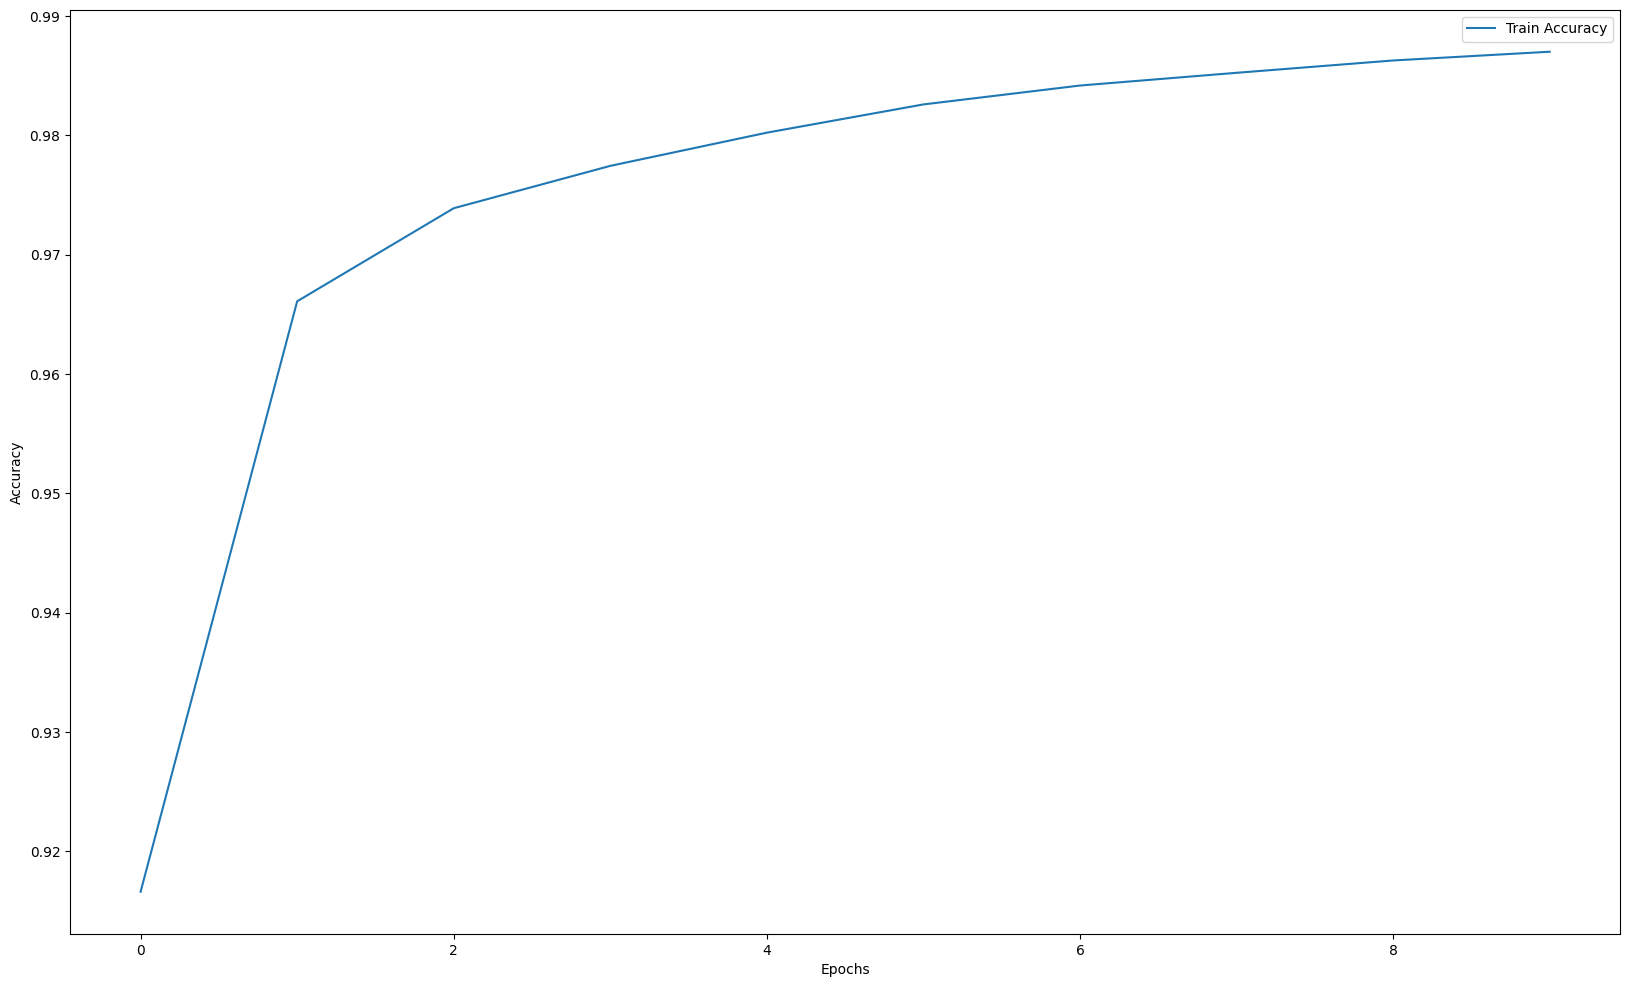

In [23]:
plt.figure(figsize=(20, 12))
plt.plot(tot_accuracy )
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy"])
plt.savefig("Accuracy.jpg")

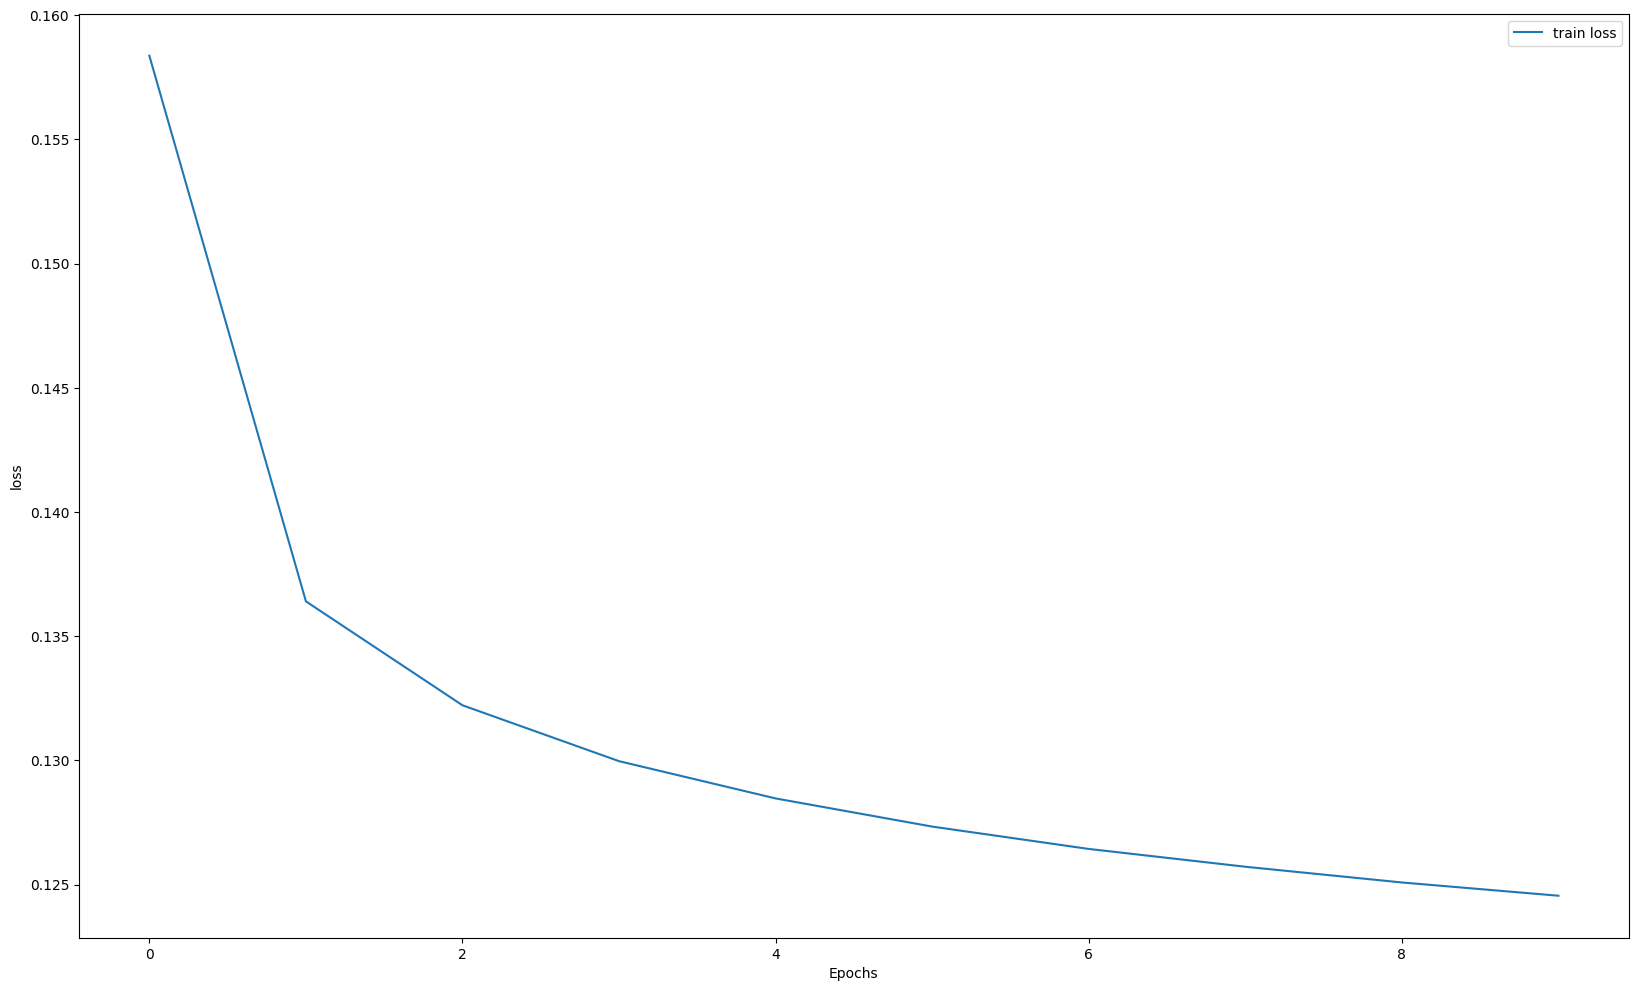

In [24]:
plt.figure(figsize=(20, 12))
plt.plot(tot_loss6)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["train loss"])
plt.savefig("loss_6.jpg")

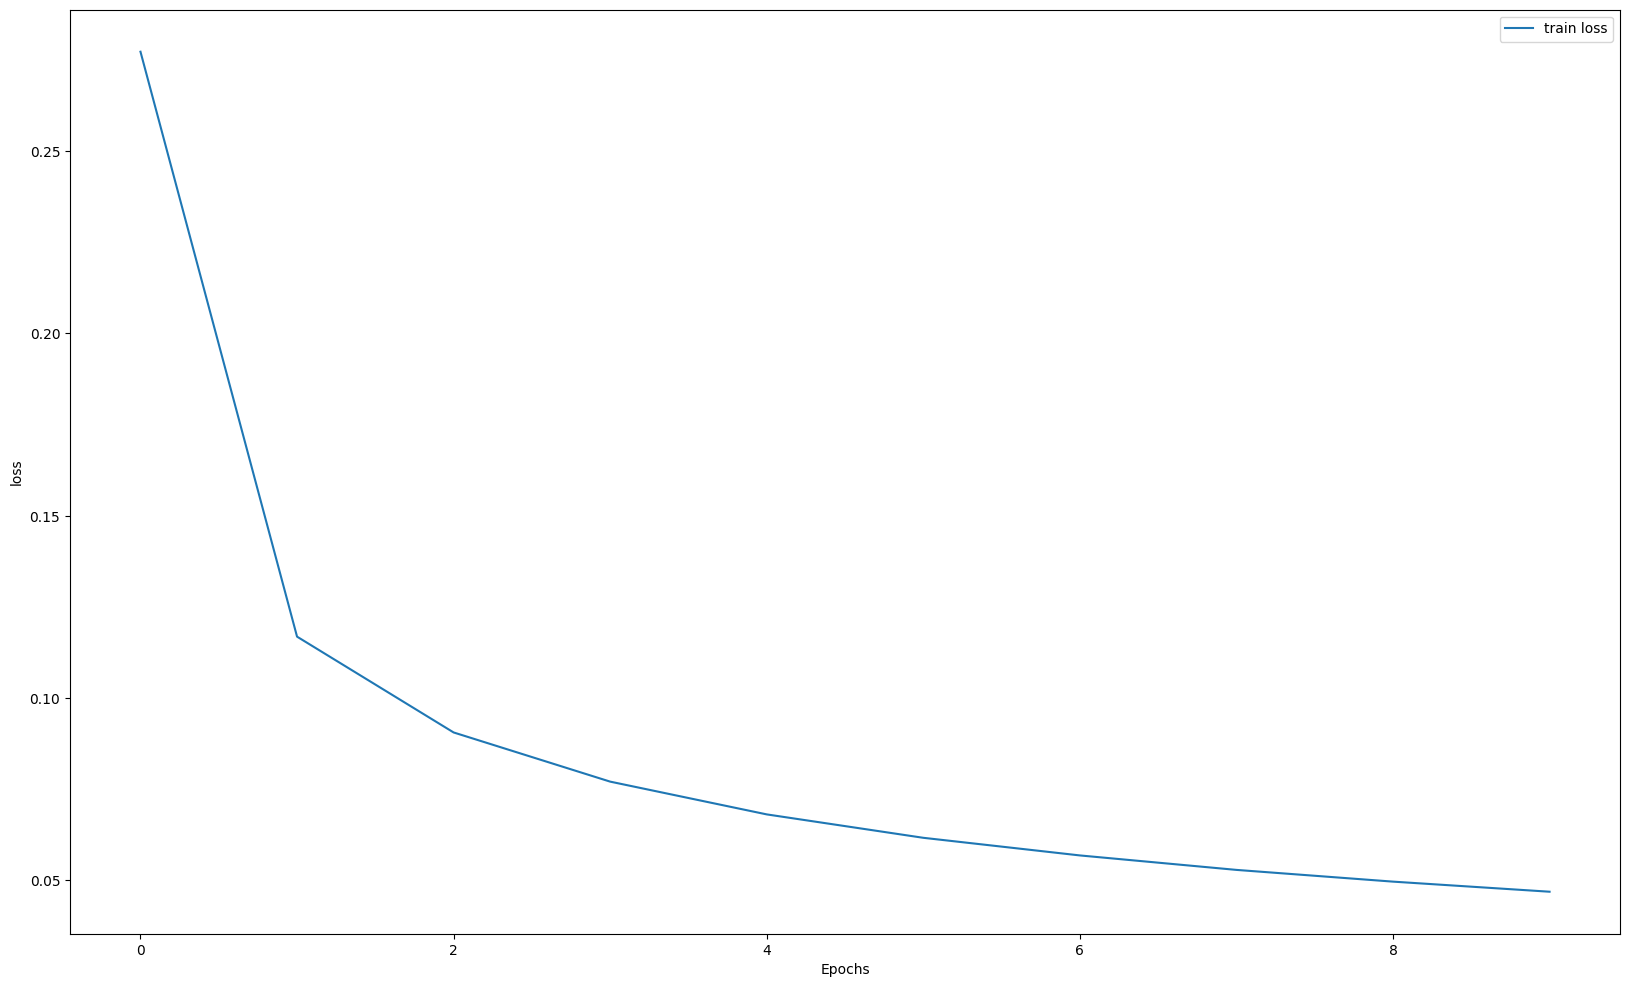

In [25]:
plt.figure(figsize=(20, 12))
plt.plot(tot_loss5)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["train loss"])
plt.savefig("loss_5.jpg")

In [26]:
class_names = ["zero","one", "two", "three", "four", "five",
"six", "seven", "eight", "nine"]

In [27]:
y_pred1 = np.array(class_names)[y_pred]

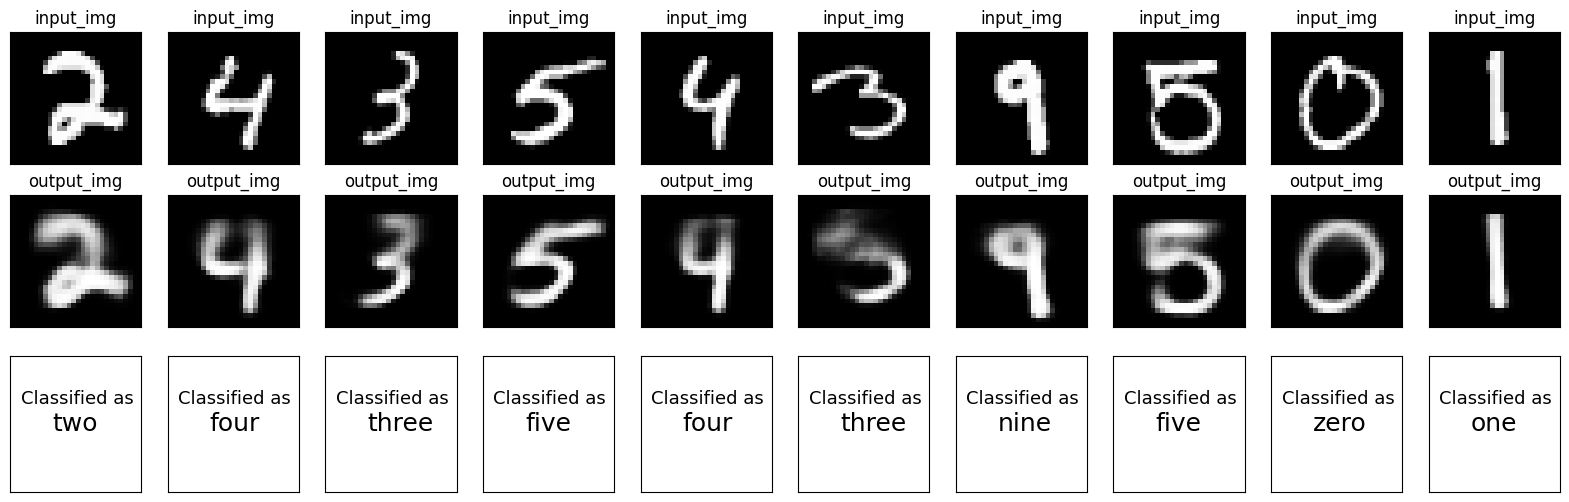

In [28]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  predictd_output = tf.reshape(out6[i+2679],[28,28])
  # predictd_output1 = tf.reshape(out5[i],[28,28])
  input_given = tf.reshape(testY[i+2679],[28,28])
  plt.imshow(input_given)
  plt.title("input_img")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(predictd_output)
  plt.title("output_img")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + 2*n)
  # plt.imshow()
  # plt.title(y_pred1[i+2679])
  plt.text(0.08,0.65,"Classified as" , fontsize=13)
  plt.text(0.32,0.45,y_pred1[i+2679], fontsize=18)
  # plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("clas_re_50epoch_10.jpg")
plt.show()

In [29]:
correct = tf.equal(tf.argmax(out5, axis=1), testY1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
print('Accuracy:', accuracy.numpy())

Accuracy: 0.9746


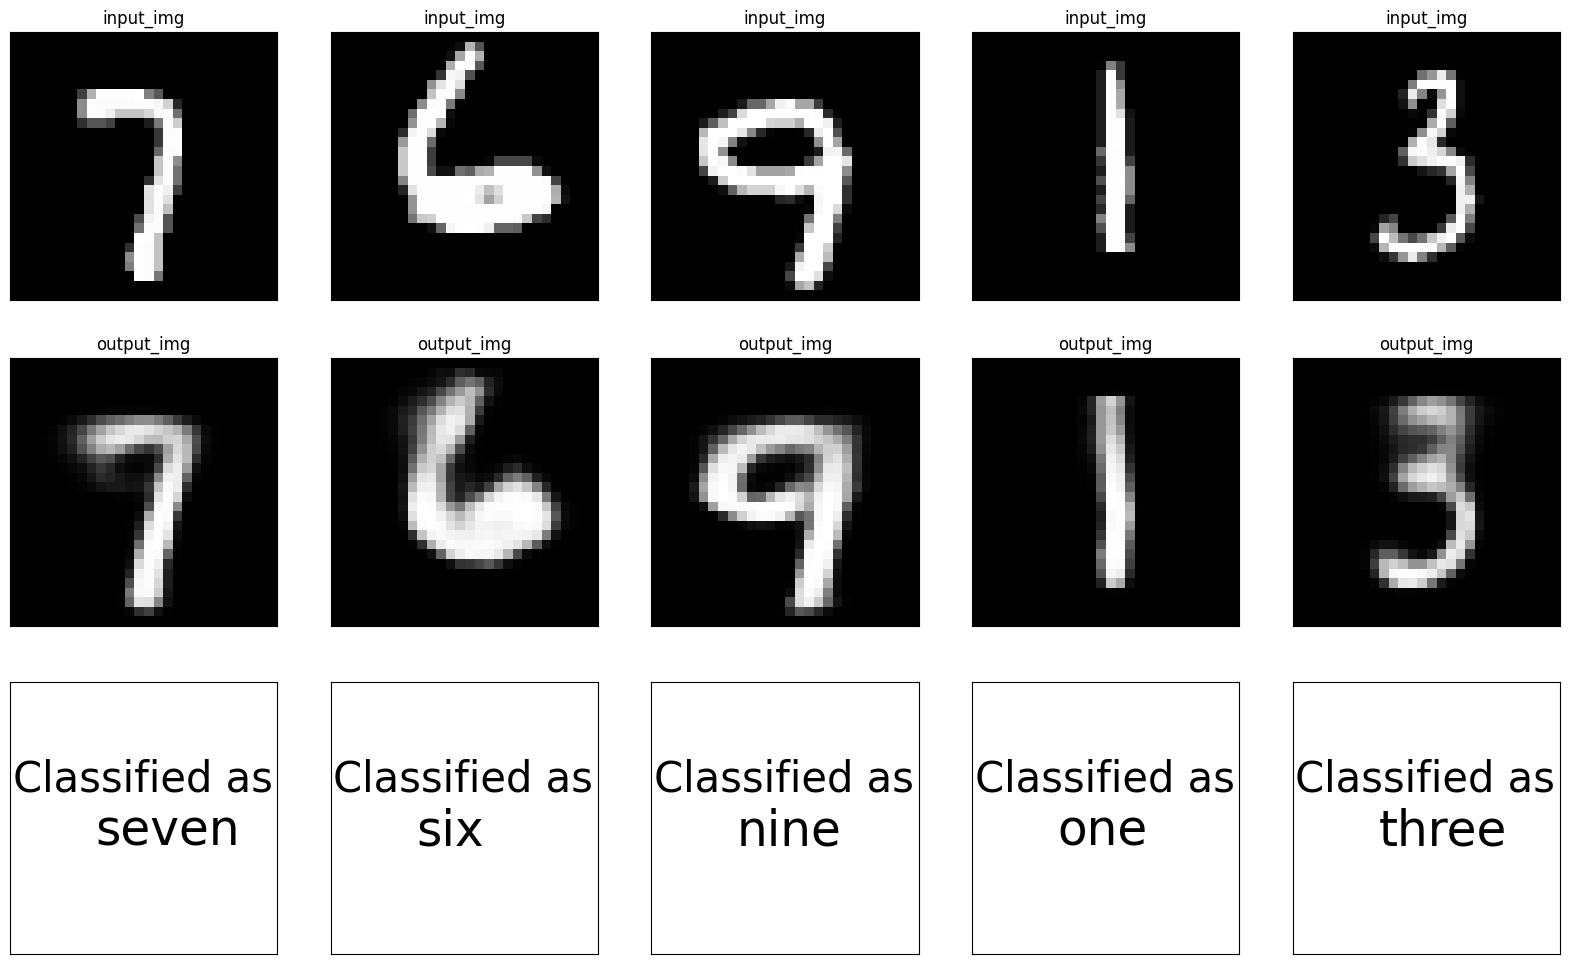

In [30]:
n = 5
plt.figure(figsize=(20, 12))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  predictd_output = tf.reshape(out6[i+679],[28,28])
  # predictd_output1 = tf.reshape(out5[i],[28,28])
  input_given = tf.reshape(testY[i+679],[28,28])
  plt.imshow(input_given)
  plt.title("input_img")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(predictd_output)
  plt.title("output_img")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + 2*n)
  # plt.imshow()
  # plt.title(y_pred1[i+2679])
  plt.text(0.01,0.6,"Classified as" , fontsize=30)
  plt.text(0.32,0.4,y_pred1[i+679], fontsize=35)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("clas_re_50epoch_5.jpg")
plt.show()

# **Node 2 zero power**

In [31]:
zs=np.zeros([10000,14,28])
out6,out5 = step1(input_test_1,zs, testY, testY1)

y_pred=np.argmax(out5,axis=1)
y_pred1 = np.array(class_names)[y_pred]

Accuracy: 0.7596
test loss6 is =  0.6423
test loss5 is =  1.031


In [32]:
psnr_out6=0
for i in range(10000):
    
  img1 = tf.reshape(out6[i],[28,28,1])
  img2 = tf.reshape(testY[i],[28,28,1])
  # Calculate PSNR between the two images
  psnr_value = psnr(img1, img2, max_val=1)
  psnr_out6 += psnr_value.numpy()

  # Print the PSNR value
print("The average PSNR value between the two images at out 6 is:", (psnr_out6/10000))

The average PSNR value between the two images at out 6 is: 10.070876166725158


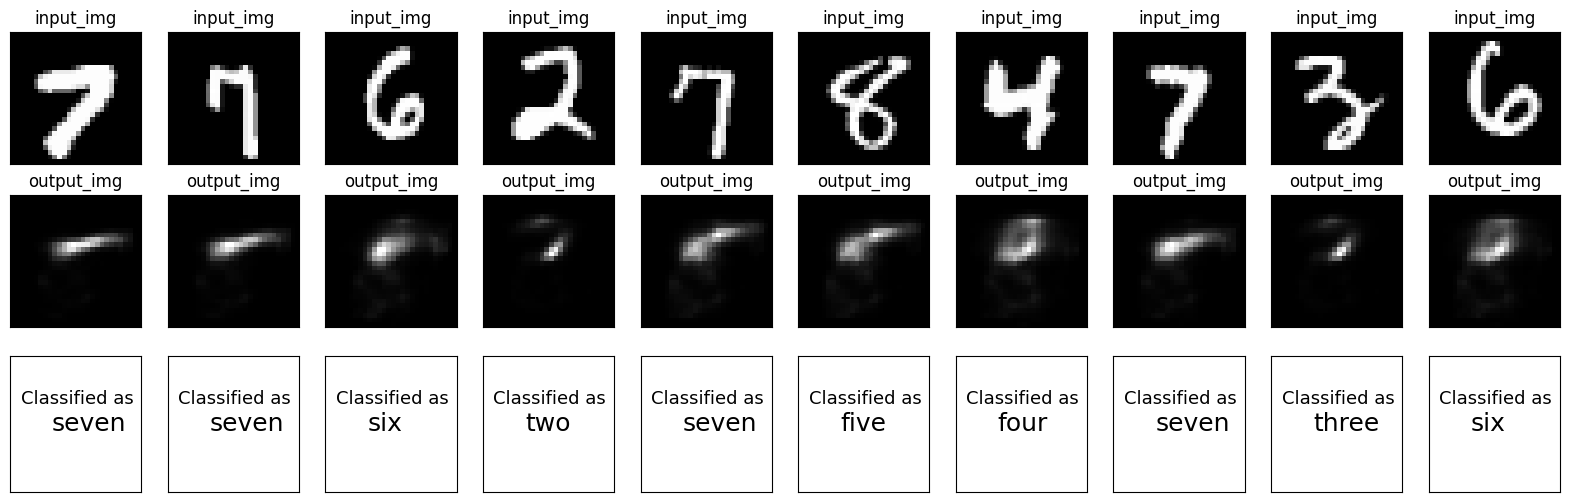

In [33]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  predictd_output = tf.reshape(out6[i+79],[28,28])
  # predictd_output1 = tf.reshape(out5[i],[28,28])
  input_given = tf.reshape(testY[i+79],[28,28])
  plt.imshow(input_given)
  plt.title("input_img")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(predictd_output)
  plt.title("output_img")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + 2*n)
  # plt.imshow()
  # plt.title(y_pred1[i+2679])
  plt.text(0.08,0.65,"Classified as" , fontsize=13)
  plt.text(0.32,0.45,y_pred1[i+79], fontsize=18)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("zs2_50_epoch_10.jpg")
plt.show()

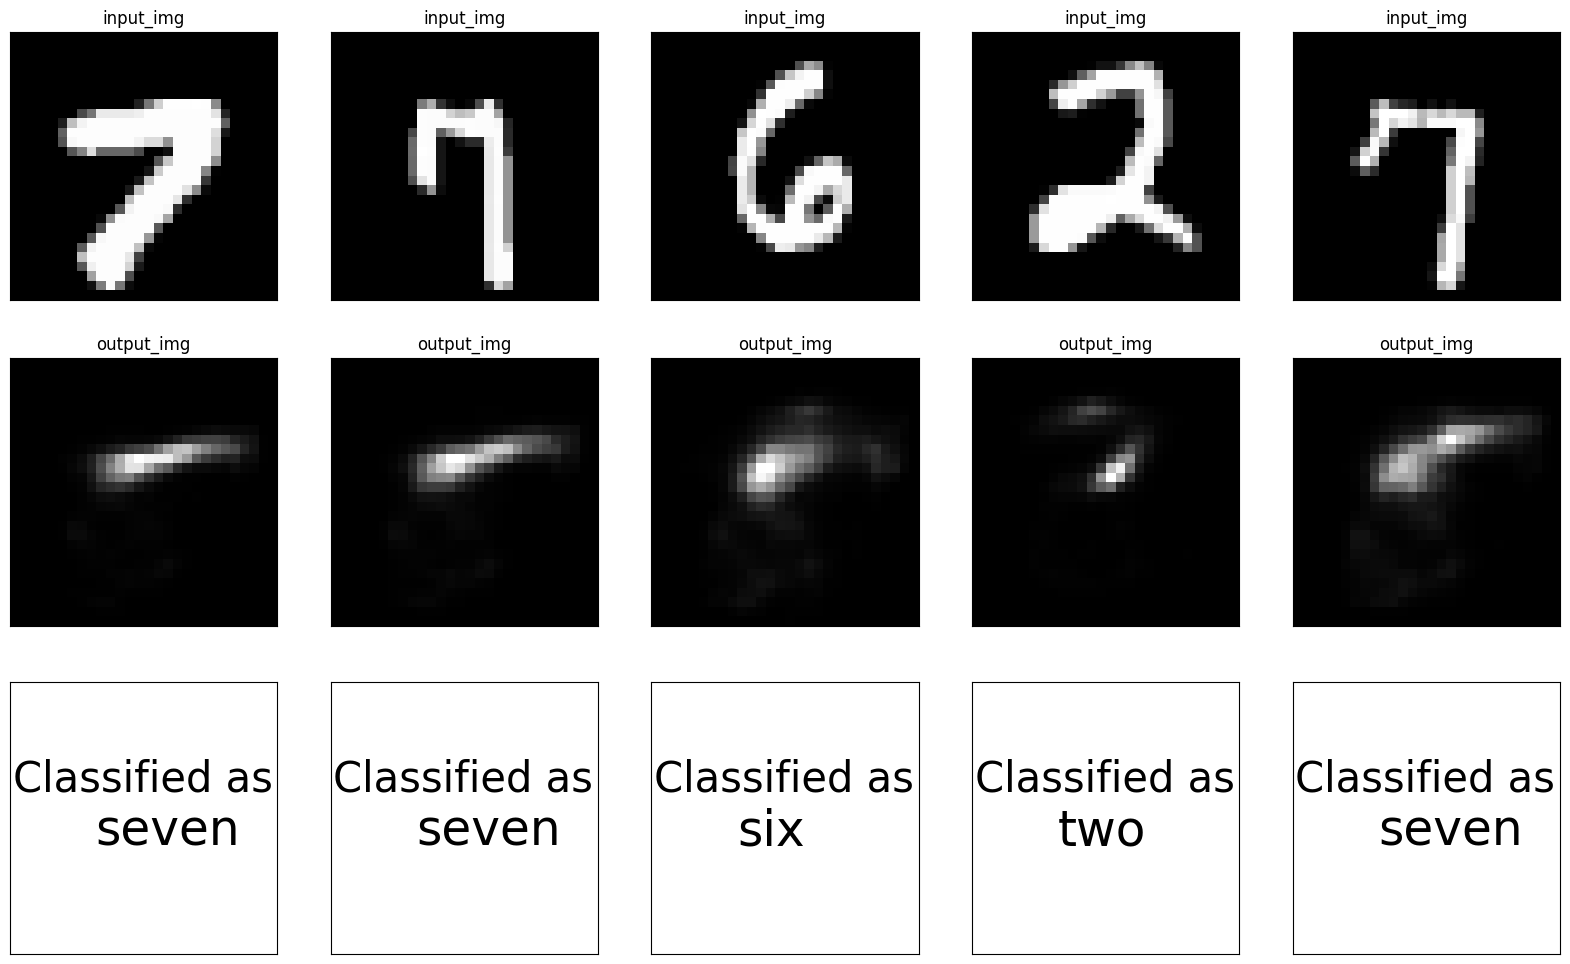

In [34]:
n = 5
plt.figure(figsize=(20, 12))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  predictd_output = tf.reshape(out6[i+79],[28,28])
  # predictd_output1 = tf.reshape(out5[i],[28,28])
  input_given = tf.reshape(testY[i+79],[28,28])
  plt.imshow(input_given)
  plt.title("input_img")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(predictd_output)
  plt.title("output_img")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + 2*n)
  # plt.imshow()
  # plt.title(y_pred1[i+2679])
  plt.text(0.01,0.6,"Classified as" , fontsize=30)
  plt.text(0.32,0.4,y_pred1[i+79], fontsize=35)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("zs2_50_epoch_5.jpg")
plt.show()

# **Node 1 zero power**

In [35]:
zs=np.zeros([10000,14,28])
out6,out5 = step1(zs,input_test_2, testY, testY1)

y_pred=np.argmax(out5,axis=1)
y_pred1 = np.array(class_names)[y_pred]

Accuracy: 0.4005
test loss6 is =  0.14
test loss5 is =  1.9282


In [36]:
psnr_out6=0
for i in range(10000):
    
  img1 = tf.reshape(out6[i],[28,28,1])
  img2 = tf.reshape(testY[i],[28,28,1])
  # Calculate PSNR between the two images
  psnr_value = psnr(img1, img2, max_val=1)
  psnr_out6 += psnr_value.numpy()

  # Print the PSNR value
print("The average PSNR value between the two images at out 6 is:", (psnr_out6/10000))

The average PSNR value between the two images at out 6 is: 16.444525432491304


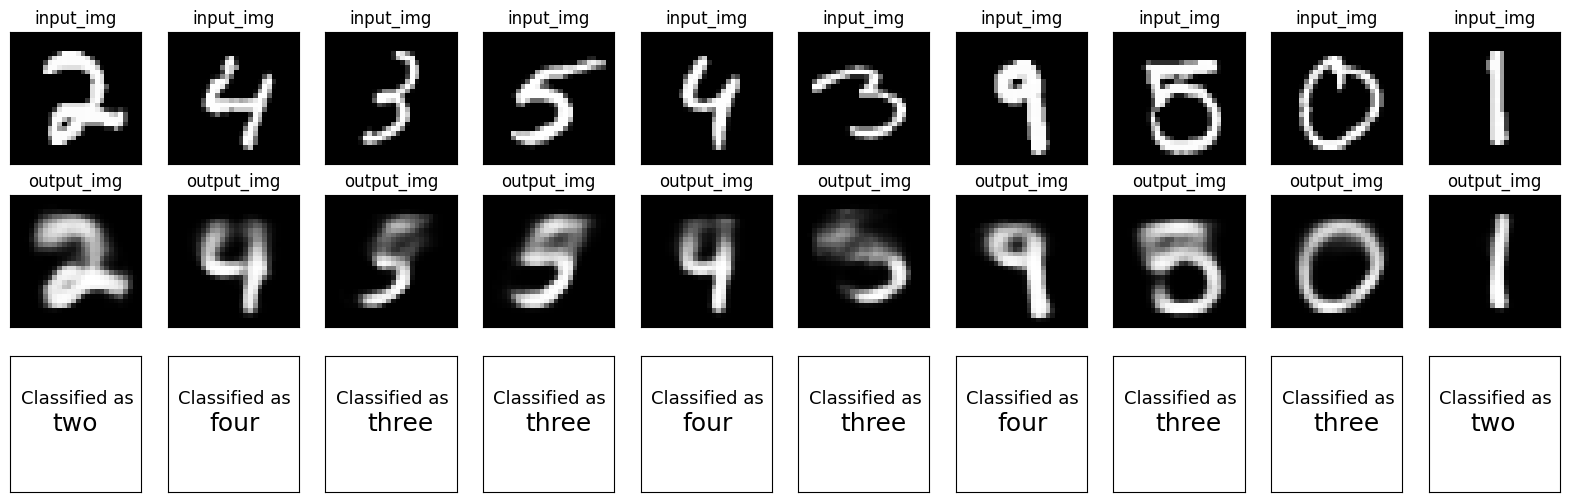

In [37]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  predictd_output = tf.reshape(out6[i+2679],[28,28])
  # predictd_output1 = tf.reshape(out5[i],[28,28])
  input_given = tf.reshape(testY[i+2679],[28,28])
  plt.imshow(input_given)
  plt.title("input_img")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(predictd_output)
  plt.title("output_img")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + 2*n)
  # plt.imshow()
  # plt.title(y_pred1[i+2679])
  plt.text(0.08,0.65,"Classified as" , fontsize=13)
  plt.text(0.32,0.45,y_pred1[i+2679], fontsize=18)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("zs1_50_epoch_10.jpg")
plt.show()

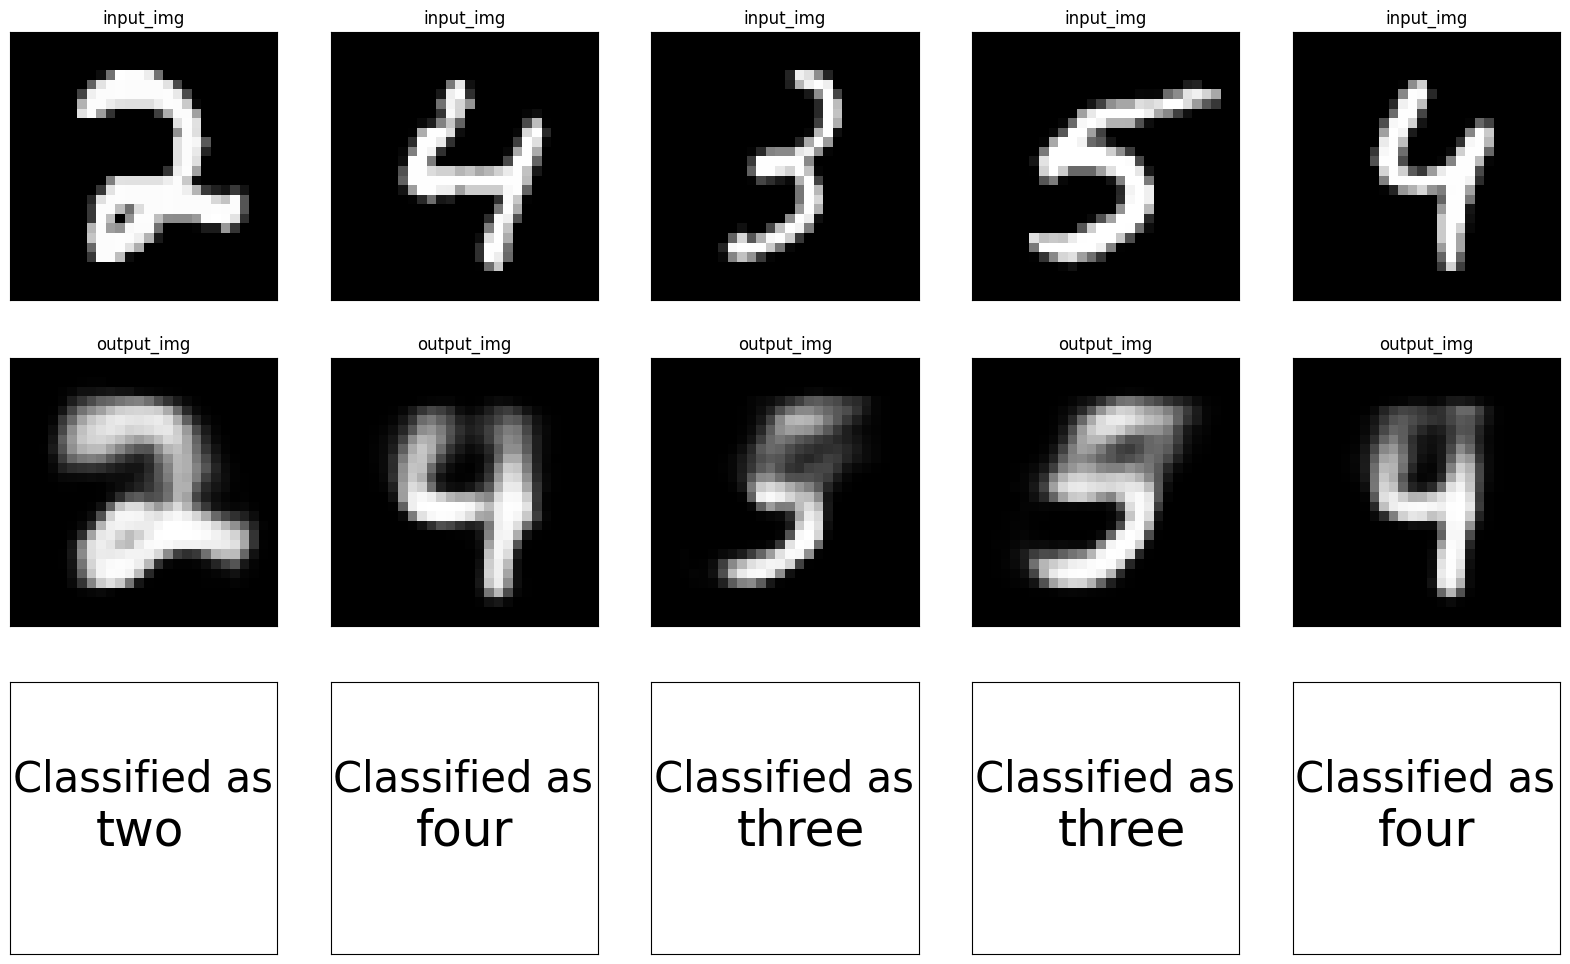

In [38]:
n = 5
plt.figure(figsize=(20, 12))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  predictd_output = tf.reshape(out6[i+2679],[28,28])
  # predictd_output1 = tf.reshape(out5[i],[28,28])
  input_given = tf.reshape(testY[i+2679],[28,28])
  plt.imshow(input_given)
  plt.title("input_img")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(predictd_output)
  plt.title("output_img")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + 2*n)
  # plt.imshow()
  # plt.title(y_pred1[i+2679])
  plt.text(0.01,0.6,"Classified as" , fontsize=30)
  plt.text(0.32,0.4,y_pred1[i+2679], fontsize=35)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("zs1_50_epoch_5.jpg")
plt.show()

In [39]:
correct = tf.equal(tf.argmax(out5, axis=1), testY1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
print('Accuracy:', accuracy.numpy())

Accuracy: 0.4005


# **Both Node Half Power Input**

In [40]:
zs=np.zeros([10000,14,28])
out6,out5 = step1(input_test_1/5,input_test_2/5, testY, testY1)

y_pred=np.argmax(out5,axis=1)
y_pred1 = np.array(class_names)[y_pred]

Accuracy: 0.8013
test loss6 is =  0.3371
test loss5 is =  0.6707


In [41]:
psnr_out6=0
for i in range(10000):
    
  img1 = tf.reshape(out6[i],[28,28,1])
  img2 = tf.reshape(testY[i],[28,28,1])
  # Calculate PSNR between the two images
  psnr_value = psnr(img1, img2, max_val=1)
  psnr_out6 += psnr_value.numpy()

  # Print the PSNR value
print("The average PSNR value between the two images at out 6 is:", (psnr_out6/10000))

The average PSNR value between the two images at out 6 is: 10.790695920085907


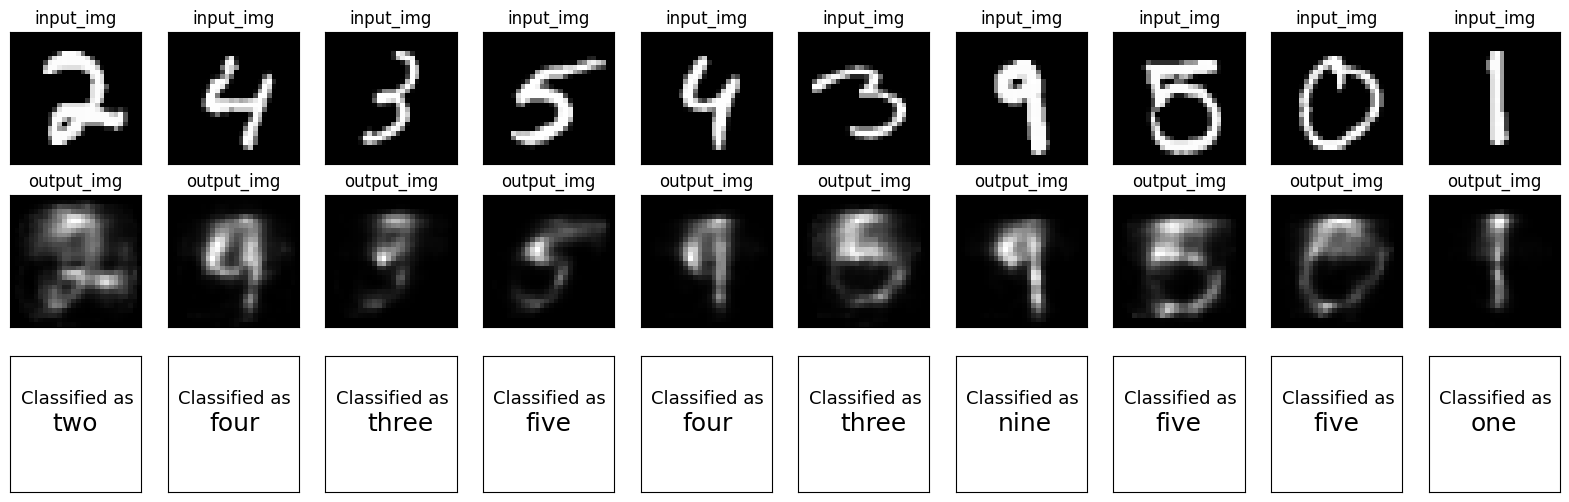

In [42]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  predictd_output = tf.reshape(out6[i+2679],[28,28])
  # predictd_output1 = tf.reshape(out5[i],[28,28])
  input_given = tf.reshape(testY[i+2679],[28,28])
  plt.imshow(input_given)
  plt.title("input_img")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(predictd_output)
  plt.title("output_img")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + 2*n)
  # plt.imshow()
  # plt.title(y_pred1[i+2679])
  plt.text(0.08,0.65,"Classified as" , fontsize=13)
  plt.text(0.32,0.45,y_pred1[i+2679], fontsize=18)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("zs_half_50_epoch_10.jpg")
plt.show()

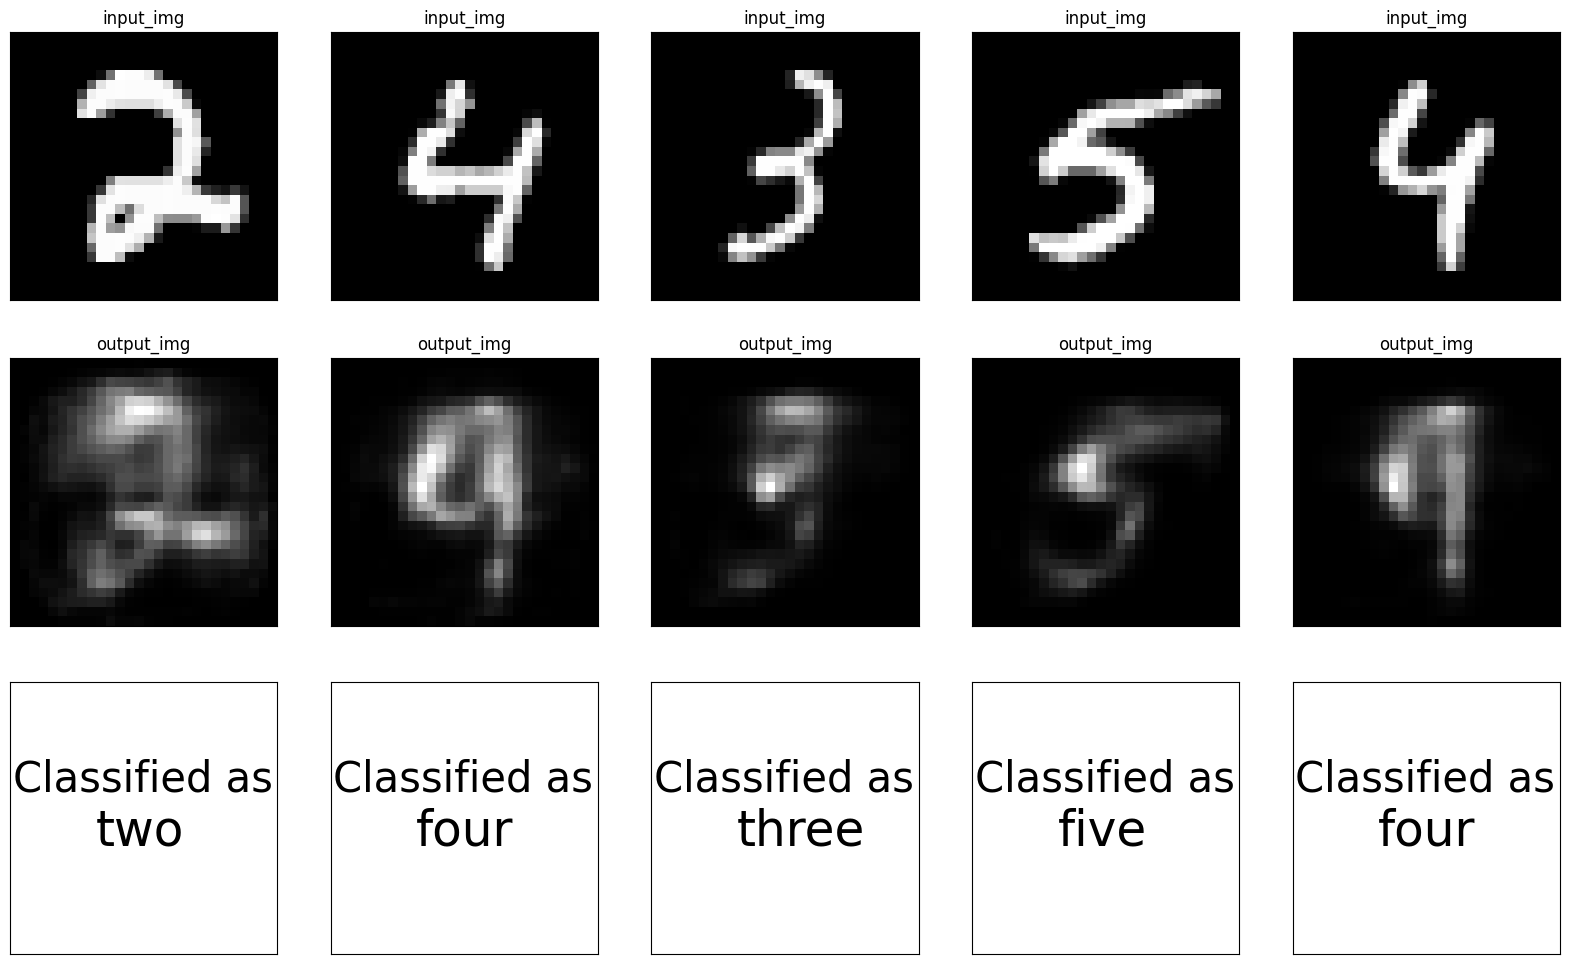

In [43]:
n = 5
plt.figure(figsize=(20, 12))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  predictd_output = tf.reshape(out6[i+2679],[28,28])
  # predictd_output1 = tf.reshape(out5[i],[28,28])
  input_given = tf.reshape(testY[i+2679],[28,28])
  plt.imshow(input_given)
  plt.title("input_img")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(predictd_output)
  plt.title("output_img")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + 2*n)
  # plt.imshow()
  # plt.title(y_pred1[i+2679])
  plt.text(0.01,0.6,"Classified as" , fontsize=30)
  plt.text(0.32,0.4,y_pred1[i+2679], fontsize=35)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("zs_half_50_epoch_5.jpg")
plt.show()

In [44]:
correct = tf.equal(tf.argmax(out5, axis=1), testY1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
print('Accuracy:', accuracy.numpy())

Accuracy: 0.8013


# **Node 1 half power**

In [45]:
zs=np.zeros([10000,14,28])
out6,out5 = step1(input_test_1/5,input_test_2, testY, testY1)

y_pred=np.argmax(out5,axis=1)
y_pred1 = np.array(class_names)[y_pred]

Accuracy: 0.7687
test loss6 is =  0.1358
test loss5 is =  0.677


In [46]:
psnr_out6=0
for i in range(10000):
    
  img1 = tf.reshape(out6[i],[28,28,1])
  img2 = tf.reshape(testY[i],[28,28,1])
  # Calculate PSNR between the two images
  psnr_value = psnr(img1, img2, max_val=1)
  psnr_out6 += psnr_value.numpy()

  # Print the PSNR value
print("The average PSNR value between the two images at out 6 is:", (psnr_out6/10000))

The average PSNR value between the two images at out 6 is: 16.68503664274216


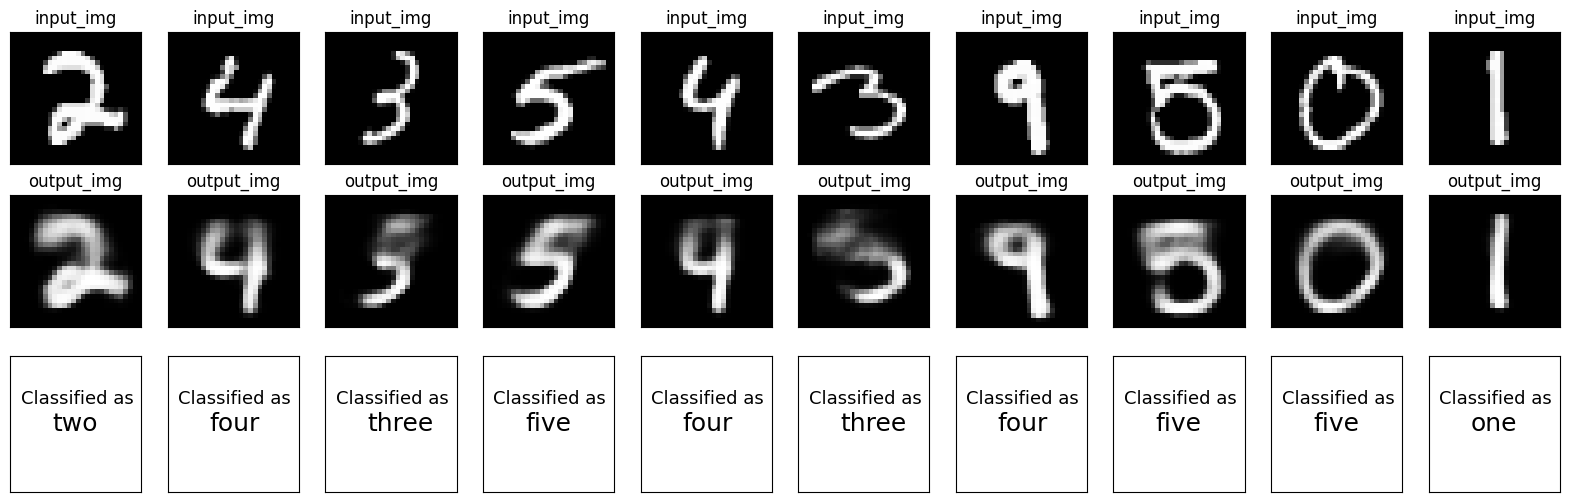

In [47]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  predictd_output = tf.reshape(out6[i+2679],[28,28])
  # predictd_output1 = tf.reshape(out5[i],[28,28])
  input_given = tf.reshape(testY[i+2679],[28,28])
  plt.imshow(input_given)
  plt.title("input_img")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(predictd_output)
  plt.title("output_img")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + 2*n)
  # plt.imshow()
  # plt.title(y_pred1[i+2679])
  plt.text(0.08,0.65,"Classified as" , fontsize=13)
  plt.text(0.32,0.45,y_pred1[i+2679], fontsize=18)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("zs1_half_50_epoch_10.jpg")
plt.show()

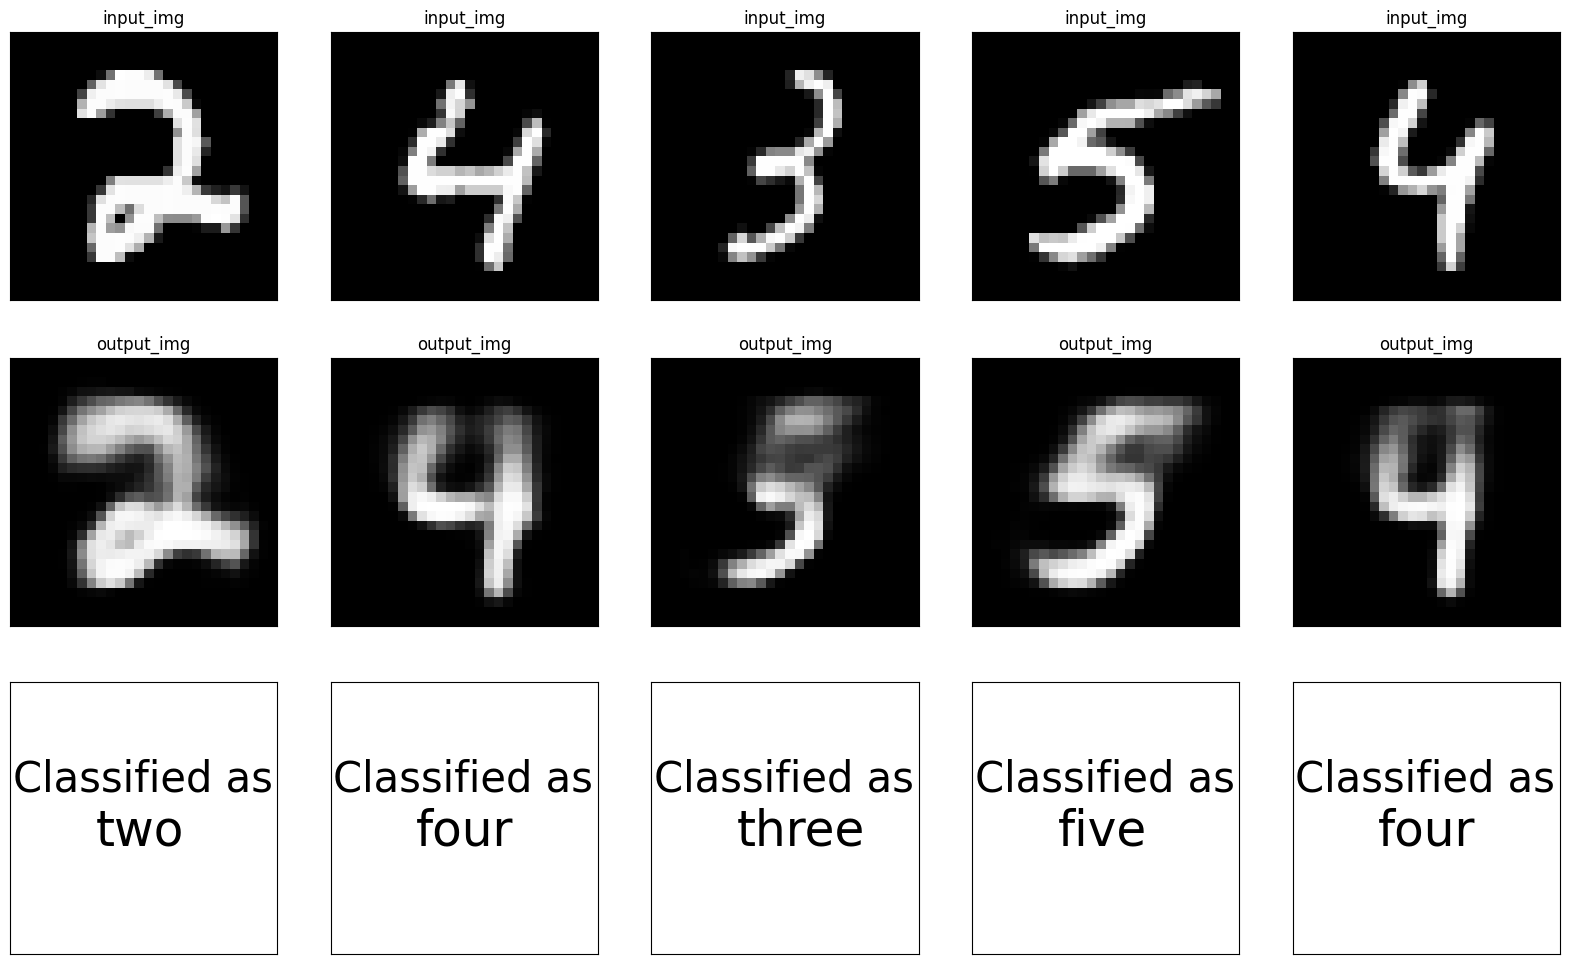

In [48]:
n = 5
plt.figure(figsize=(20, 12))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  predictd_output = tf.reshape(out6[i+2679],[28,28])
  # predictd_output1 = tf.reshape(out5[i],[28,28])
  input_given = tf.reshape(testY[i+2679],[28,28])
  plt.imshow(input_given)
  plt.title("input_img")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(predictd_output)
  plt.title("output_img")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + 2*n)
  # plt.imshow()
  # plt.title(y_pred1[i+2679])
  plt.text(0.01,0.6,"Classified as" , fontsize=30)
  plt.text(0.32,0.4,y_pred1[i+2679], fontsize=35)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("zs1_half_50_epoch_5.jpg")
plt.show()

In [49]:
correct = tf.equal(tf.argmax(out5, axis=1), testY1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
print('Accuracy:', accuracy.numpy())

Accuracy: 0.7687


# **Node 2 Half Power**

In [50]:
zs=np.zeros([10000,14,28])
out6,out5 = step1(input_test_1,input_test_2/5, testY, testY1)

y_pred=np.argmax(out5,axis=1)
y_pred1 = np.array(class_names)[y_pred]

Accuracy: 0.8963
test loss6 is =  0.3404
test loss5 is =  0.351


In [51]:
psnr_out6=0
for i in range(10000):
    
  img1 = tf.reshape(out6[i],[28,28,1])
  img2 = tf.reshape(testY[i],[28,28,1])
  # Calculate PSNR between the two images
  psnr_value = psnr(img1, img2, max_val=1)
  psnr_out6 += psnr_value.numpy()

  # Print the PSNR value
print("The average PSNR value between the two images at out 6 is:", (psnr_out6/10000))

The average PSNR value between the two images at out 6 is: 10.914881005334854


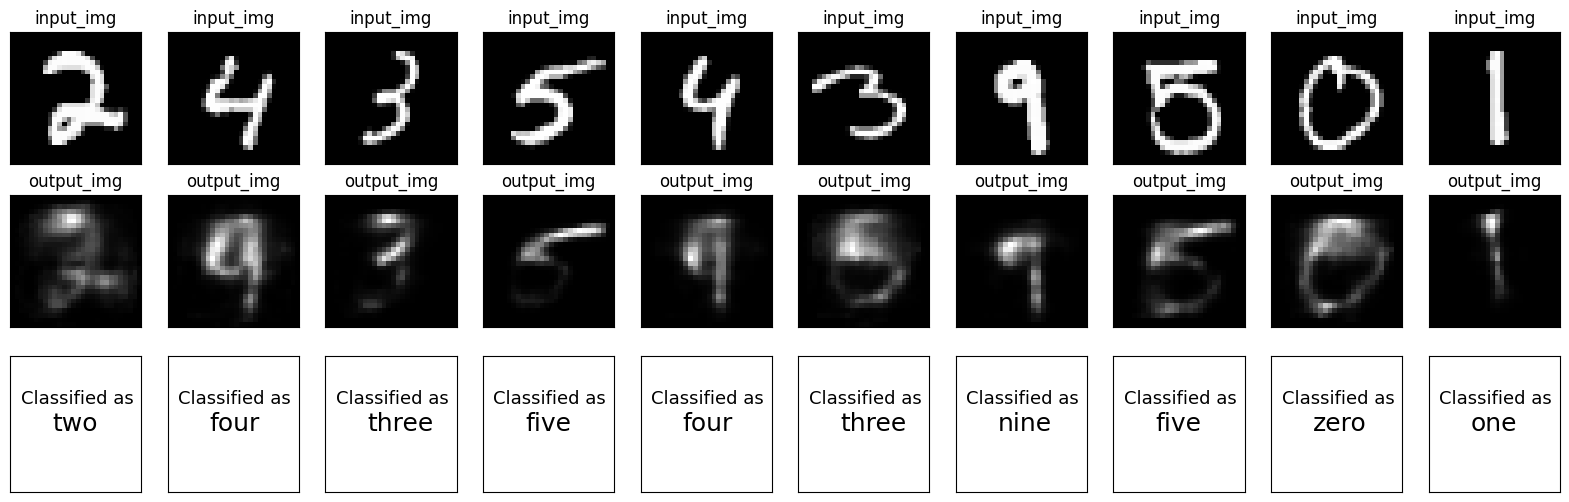

In [52]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  predictd_output = tf.reshape(out6[i+2679],[28,28])
  # predictd_output1 = tf.reshape(out5[i],[28,28])
  input_given = tf.reshape(testY[i+2679],[28,28])
  plt.imshow(input_given)
  plt.title("input_img")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(predictd_output)
  plt.title("output_img")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + 2*n)
  # plt.imshow()
  # plt.title(y_pred1[i+2679])
  plt.text(0.08,0.65,"Classified as" , fontsize=13)
  plt.text(0.32,0.45,y_pred1[i+2679], fontsize=18)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("zs2_half_50_epoch_10.jpg")
plt.show()

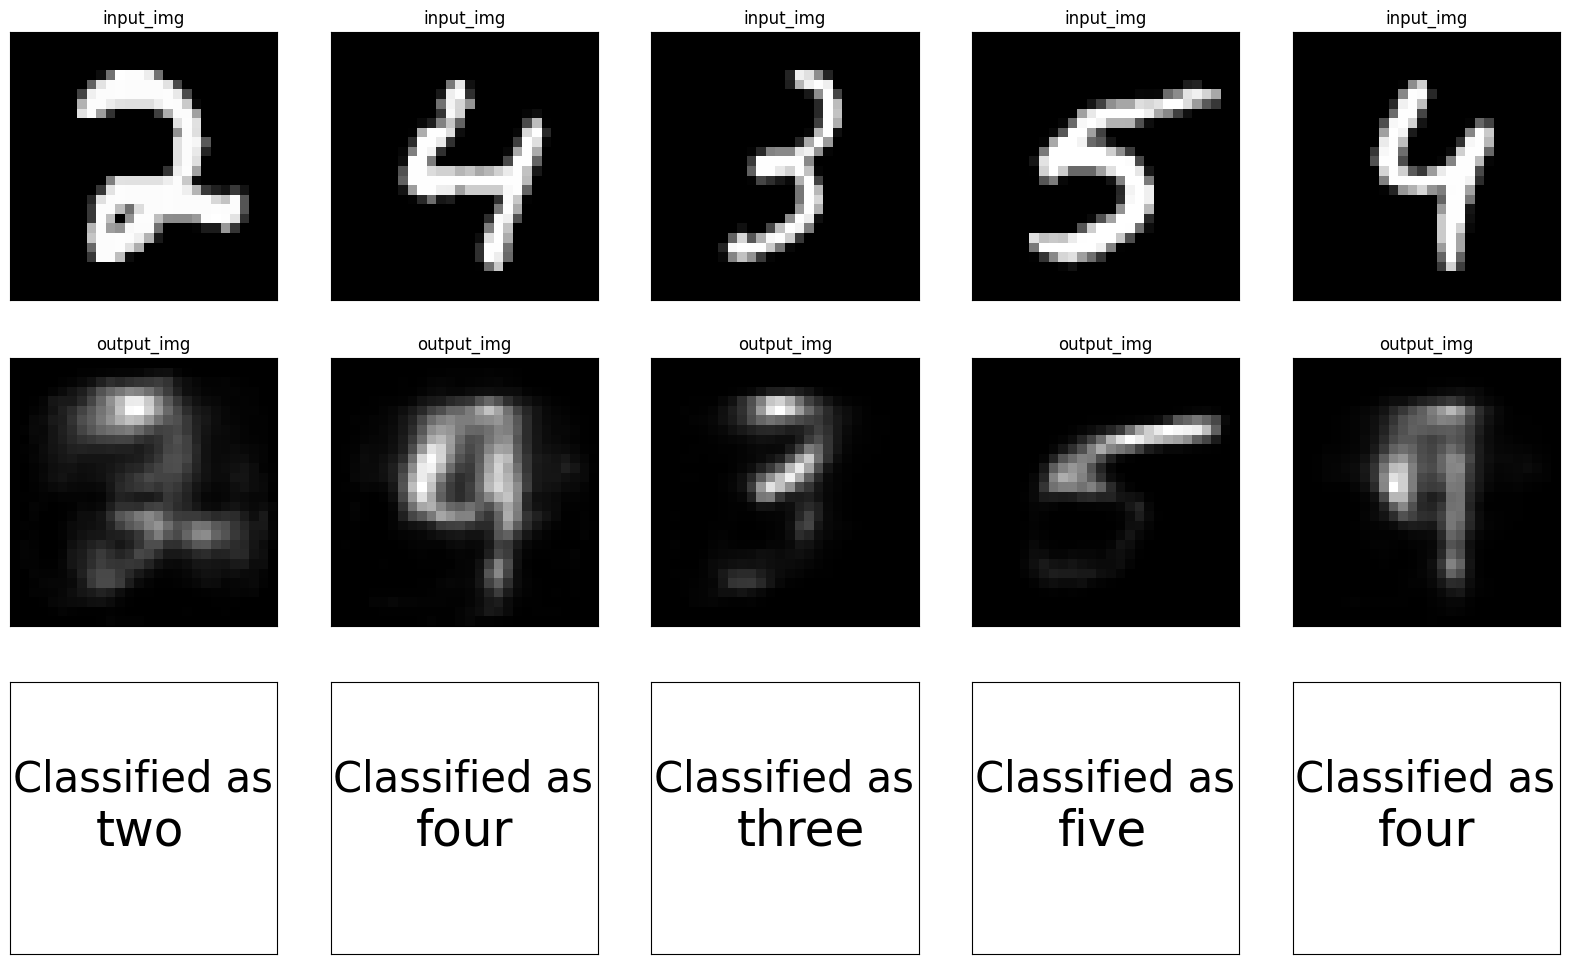

In [53]:
n = 5
plt.figure(figsize=(20, 12))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  predictd_output = tf.reshape(out6[i+2679],[28,28])
  # predictd_output1 = tf.reshape(out5[i],[28,28])
  input_given = tf.reshape(testY[i+2679],[28,28])
  plt.imshow(input_given)
  plt.title("input_img")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(predictd_output)
  plt.title("output_img")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + 2*n)
  # plt.imshow()
  # plt.title(y_pred1[i+2679])
  plt.text(0.01,0.6,"Classified as" , fontsize=30)
  plt.text(0.32,0.4,y_pred1[i+2679], fontsize=35)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("zs2_half_50_epoch_5.jpg")
plt.show()

In [54]:
correct = tf.equal(tf.argmax(out5, axis=1), testY1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
print('Accuracy:', accuracy.numpy())

Accuracy: 0.8963
